# HAND SIGN DATASET

## Introduction

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabet letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. 

## Tools


1.Python

2.scikit-learn / sklearn

3.Pandas

4.NumPy

5.matplotlib

6.Jupyter 


## Objectives

(A.)View the data as an image

(B.)Train different classifiers

(C.)Compare performance for different classifiers using various metrics


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [2]:
#reading csv file 
df=pd.read_csv('sign_mnist_train.csv')

In [3]:
#shape of data
df.shape

(27455, 785)

In [4]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
#finding if any null values
df.isnull().values.any()

False

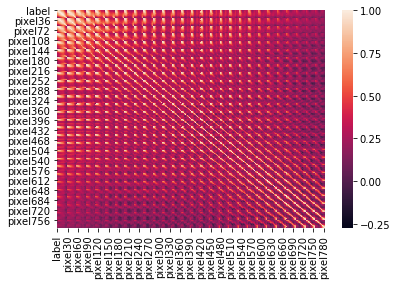

In [6]:
#defining correlation using heat maop
corr_m = df.corr()
sns.heatmap(corr_m)

In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


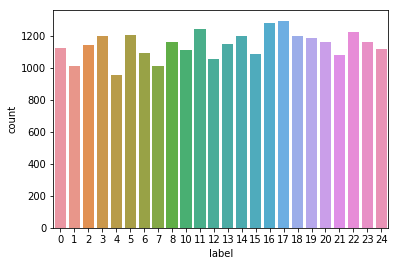

In [8]:
#plotting the total number of each type of label in data
sns.countplot(df['label'])
plt.show()

In [9]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [10]:

print(Y)

0         3
1         6
2         2
3         2
4        13
5        16
6         8
7        22
8         3
9         3
10       18
11       10
12       16
13       22
14       20
15       16
16       17
17       13
18       13
19       19
20       18
21       21
22       16
23       23
24        3
25       23
26       24
27       18
28       22
29        1
         ..
27425    21
27426    21
27427     4
27428    17
27429     5
27430    12
27431    19
27432     2
27433    22
27434    12
27435     1
27436    19
27437    16
27438    21
27439    11
27440     5
27441    18
27442     0
27443    21
27444    18
27445    14
27446    19
27447    11
27448    12
27449    20
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64


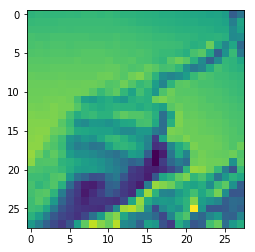

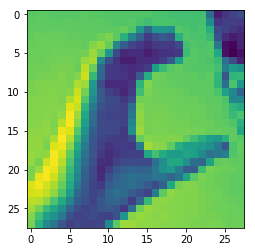

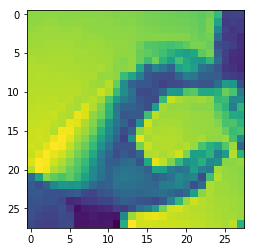

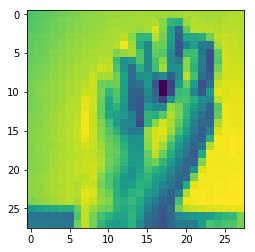

In [11]:
#forming pictures from pixels
first = X.iloc[1,:]
second = X.iloc[2,:]
third = X.iloc[3,:]
fourth = X.iloc[4,:]

first = np.array(first , dtype='float')
second = np.array(second , dtype='float')
pixel = first.reshape((28,28))
pixel2 = second.reshape((28,28))
third = np.array(third , dtype='float')
pixel3 = third.reshape((28,28))
fourth = np.array(fourth , dtype='float')
pixel4 = fourth.reshape((28,28))
plt.imshow(pixel)
plt.show()
plt.imshow(pixel2)
plt.show()
plt.imshow(pixel3)
plt.show()
plt.imshow(pixel4)
plt.show()

In [12]:
print(Y.iloc[1])

6


### Splitting The Data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

## KNN

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

    In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

    In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# instantiate
classifier = KNeighborsClassifier()
# fitting the data
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
# predict
Y_pred=classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
cm = confusion_matrix(Y_test,Y_pred)

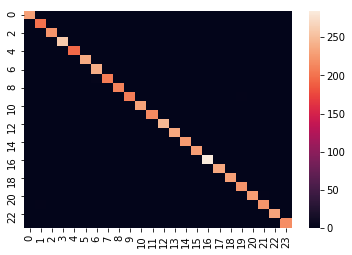

In [18]:
sns.heatmap(cm)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
#accuracy score
ascore=accuracy_score(Y_test , Y_pred , normalize=True)
print(ascore)

0.9959934438171554


In [21]:
from sklearn.metrics import f1_score
#f1_score
score=f1_score(Y_pred, Y_test,average='weighted')
print(score)

0.9959910741054302



## RandomForest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# instantiate
rc = RandomForestClassifier()
# fitting the data
rc.fit(X_train , Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
# predict
rc_pred = rc.predict(X_test)

In [25]:
ascore2=accuracy_score(Y_test , rc_pred)
print(ascore2)

0.98433800764888


In [26]:
score2=f1_score(Y_test, rc_pred,average='weighted')
print(score2)

0.9843210279523854


## SVM

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). A SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [27]:
from sklearn.svm import SVC
# instantiate
svc = SVC()
# fitting the data
svc.fit(X_train , Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# predict
sv_pred = svc.predict(X_test)

In [29]:
ascore3=accuracy_score(Y_test , sv_pred)
print(ascore3)

0.22145328719723184


In [30]:
score3=f1_score(Y_test, sv_pred,average='weighted')
print(score3)

0.3055180482204343


## Naive Bayes

In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
# instantiate
obj = GaussianNB()

In [33]:
#fitting the data
obj.fit(X_train,Y_train)

GaussianNB(priors=None)

In [34]:
# predict
Y_pred = obj.predict(X_test)

In [35]:
ascore4=accuracy_score(Y_test,Y_pred)
print(ascore4)

0.44873429247860136


In [36]:
score4=f1_score(Y_test, Y_pred,average='weighted')
print(score4)

0.44435195085135853


## MultinomialNB

In [37]:
from sklearn.naive_bayes import MultinomialNB
# instantiate
ob = MultinomialNB()
# fitting the data
ob.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
# predict
Y_pred = ob.predict(X_test)

In [39]:
ascore5=accuracy_score(Y_test,Y_pred)
print(ascore5)

0.5321435075578219


In [40]:
score5=f1_score(Y_test, Y_pred,average='weighted')
print(score5)

0.5284714258990376


## Decision Tree Classifier

Decision tree learning is a method commonly used in data mining.[1] The goal is to create a model that predicts the value of a target variable based on several input variables. An example is shown in the diagram at right. Each interior node corresponds to one of the input variables; there are edges to children for each of the possible values of that input variable. Each leaf represents a value of the target variable given the values of the input variables represented by the path from the root to the leaf.

In [41]:
from sklearn.tree import DecisionTreeClassifier
# instantiate
dtc = DecisionTreeClassifier()


In [42]:
# fitting the data
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
# predict
Y_pred = dtc.predict(X_test)

In [44]:
#accuracy
ascore6=accuracy_score(Y_test,Y_pred)
print(ascore6)

0.8683299945365143


In [45]:
# f1 score
score6 = f1_score(Y_pred, Y_test,average='weighted')
print(score6)

0.8684179264853535


## Conclusion

In [46]:
Accuracy = [ascore,ascore2,ascore3,ascore4,ascore5,ascore6]
data1 = {
    'Accuracy':Accuracy,
    'Algorithm': ['KNN','Random Forest Classifier','SVM linear',"Naive Baye's","MultinominalNB",'Decision Tree']}

df1 = pd.DataFrame(data1)

In [47]:
F1_score = [score,score2,score3,score4,score5,score6]
data2 = {
    'F1_score':F1_score,
    'Algorithm': ['KNN','Random Forest Classifier','SVM linear',"Naive Baye's","MultinominalNB",'Decision Tree']}

df2 = pd.DataFrame(data2)

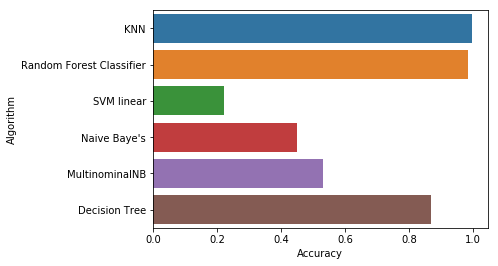

In [48]:
sns.barplot(x = df1.Accuracy, y = df1.Algorithm)

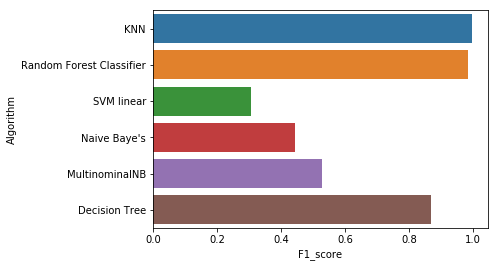

In [49]:
sns.barplot(x = df2.F1_score, y = df2.Algorithm)